# 线性回归算法的实现

In [53]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

## 生成数据集
给定W和b，生成数据集。
d2l.synthetic_data生成均值为0，方差为1的X，并添加均值为0，方差为0.01的noise

In [54]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
help(d2l.synthetic_data)

Help on function synthetic_data in module d2l.torch:

synthetic_data(w, b, num_examples)
    Generate y = Xw + b + noise.
    
    Defined in :numref:`sec_linear_scratch`



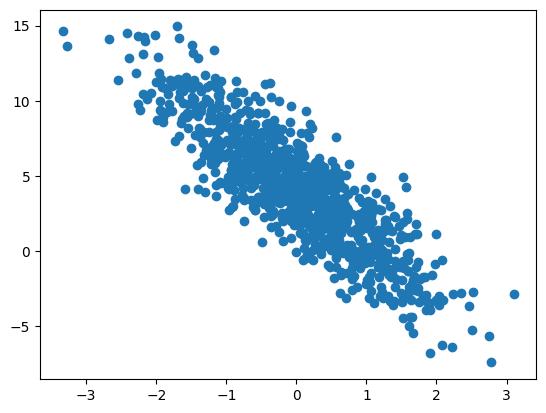

In [55]:
d2l.plt.scatter(features[:,1], labels)

## 读取数据集


In [56]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个数据迭代器
       Parameters:
       ---------------
       data_arrays: features ans labels
       batch_size: the size of batch
       is_train: the dataset is training set or not, if it is training set then need to shuffle the order randomly
    """
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [57]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[-1.3216, -0.3369],
         [ 0.5175, -0.5740],
         [ 0.5448, -0.5093],
         [-0.0286, -0.6170],
         [ 0.0456,  0.3517],
         [ 0.3950,  1.1306],
         [-1.6644, -0.9580],
         [-0.2157, -0.1867],
         [-1.4928,  1.6502],
         [ 0.9758, -1.0996]]),
 tensor([[ 2.7019],
         [ 7.1910],
         [ 7.0372],
         [ 6.2435],
         [ 3.0813],
         [ 1.1551],
         [ 4.1312],
         [ 4.3985],
         [-4.4075],
         [ 9.8827]])]

## 定义模型
nn short for *neural networw*

nn.Liner(): size of each input, size of each output, need bias or not

In [58]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1, True))
# help(nn.Linear(2,1))

### 初始化模型参数
设定初始weight为均值0，方差0.01的正态分布

初始bias为0

In [59]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

## 定义loss
计算均方误差，使用MSELoss，默认返回所有样本损失的平均值

In [60]:
loss=nn.MSELoss()

## 定义优化算法

In [61]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
# help(torch.optim.SGD)

## 训练
X, y为batch后的

In [63]:
num_epochs = 3

for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y) # net(X)为预测值
        trainer.zero_grad()
        l.backward()
        trainer.step() # 进行模型更新
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000307
epoch 2, loss 0.000101
epoch 3, loss 0.000101


In [ ]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([0.0003, 0.0002])
b的估计误差： tensor([-0.0003])
